In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.shape

(6362620, 11)

Importing Other necessary libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Analyzing the dataset(How data looks like ,type of data in the Dataset)

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking the missing values in the data

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Therefore there no missing values in the dataset

In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

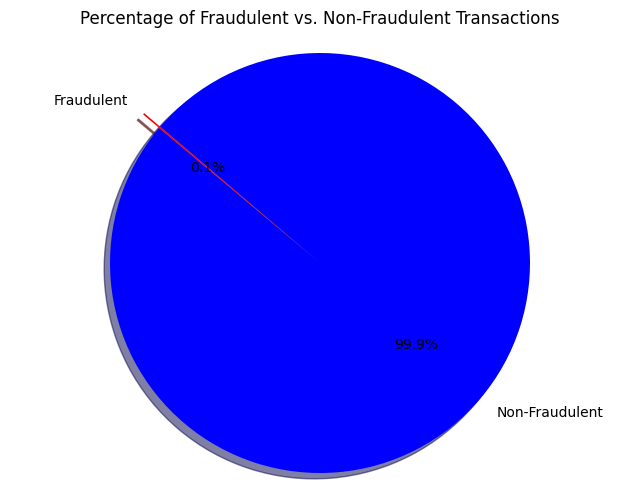

In [12]:
fraud_percentage = (df['isFraud'].value_counts(normalize=True) * 100).round(2)

# Create a pie chart to visualize the percentage
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ['blue', 'red']
explode = (0, 0.1)  # Explode the 'Fraudulent' slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(fraud_percentage, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()


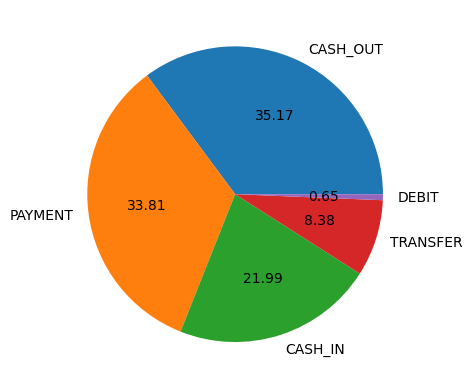

In [13]:
plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

<Axes: >

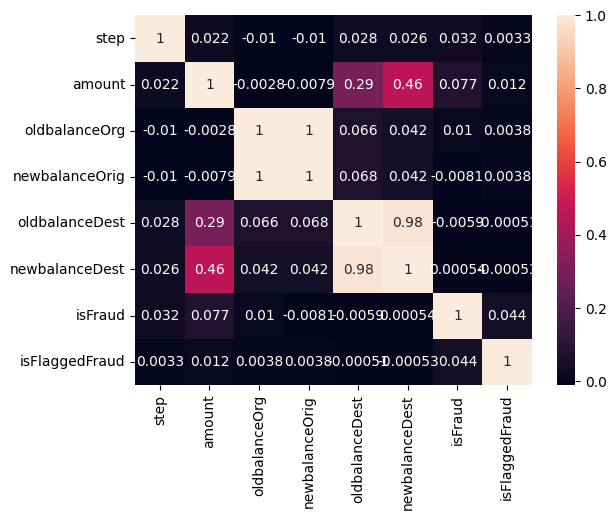

In [14]:
correlation_matrix=df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

sns.heatmap(correlation_matrix,annot=True)

Analysis of Features

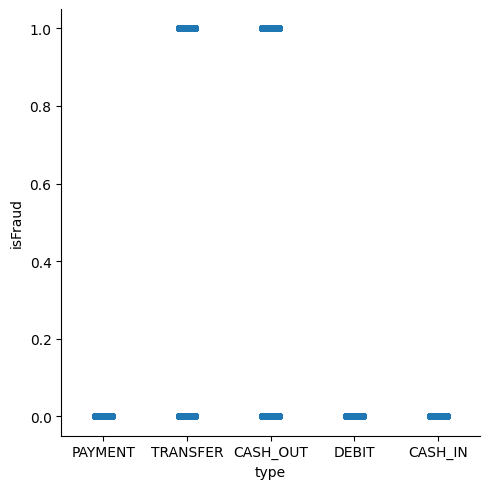

In [15]:
sns.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [16]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


all transactions which contain 'amount'=0 , are fraud transactions.
Its obvious that if someone having NIL amount in their account, then their is no sense to transfer money.

In [17]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


if 'amount'=='oldbalanceOrg', then its Fraud Transactions.
It means , whenever fraudulent agents are aware about target account balance.

Data preprocessing

In [18]:
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())
df['nameDest'].value_counts()
df['nameOrig'].value_counts()




 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

most of the data inside "nameOrig" and "nameDest"
are unique ( approx 90% and 60% ), means it will be not useful for model training .
Thus, good option is to remove them.

In [19]:
df=df.drop({'nameOrig','nameDest'},axis=1)


Feature Encoding

In [21]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])

Handling Un-Balanced Data 

In [22]:
# #Creating 2 new DataFrame ,
# one contain fraud transaction
# and another one contain genuine transaction

normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [23]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 9)
(8213, 9)


In [24]:
# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=8213)

In [25]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [26]:
new_df.shape

(16426, 9)

In [27]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

Feature Scaling :-

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

Training and Evaluating model


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
Log_regress=LogisticRegression()
Random_forest=RandomForestClassifier()
Log_regress.fit(x_train_scaler,y_train)




LogisticRegression()

In [41]:
Random_forest.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [49]:
Log_regress.score(x_test_scaler,y_test)

0.8846622032866708

In [48]:
Random_forest.score(x_test_scaler,y_test)

0.9914790018259282

Evaluating a models


In [53]:

#confusion matrix

from sklearn.metrics import confusion_matrix
y_preds1 = Log_regress.predict(x_test_scaler)
y_preds2=Random_forest.predict(x_test_scaler)
pd.crosstab(y_test, 
            y_preds1, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])




Predicted Label,0,1
Actual Label,,
0,1594,49
1,330,1313


In [54]:
pd.crosstab(y_test, 
            y_preds2, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,1622,21
1,7,1636


Classification report


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1643
           1       0.96      0.80      0.87      1643

    accuracy                           0.88      3286
   macro avg       0.90      0.88      0.88      3286
weighted avg       0.90      0.88      0.88      3286



In [56]:
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



Answering all the questions mentioned in the task

#Describe your fraud detection model in elaboration.

Ans:-First I have read the data ,how many type of data are there in the dataset, all the other information regarding the dataset,Then preprocrssed the data ,Checked correlation between target variables and dependent variable and removed the independent variable ,then we removed the independent variables and fixed the unbalanced data ,leading to training of machine learning models ,i trained two machine learning models Linear Regressor and RandomforestClassifier and evaluated using score ,classification report and confusion matrix methods

#How did you select variables to be included in the model?

Ans. I checked the correlation between the isFraud column and other columns ,and removed independent variables, thats how i selected the variables for X and for Y i chose isFraud that give us information about Fraud transactions

#What are the key factors that predict fraudulent customer?

Ans.Fraudulent Trasaction were mostly in Cashout and Transfer type transactions and origin_balance and dest_balance are same ie. amount is zero these were the main factors that gave us prediction about fradulent customers 

#What kind of prevention should be adopted while company update its infrastructure?


When a financial company updates its infrastructure, especially in the context of fraud prevention and detection, it's essential to implement various preventive measures to maintain and enhance security. Here are some key prevention strategies to consider:

1.Multi-Factor Authentication (MFA):
2.Enhanced Encryption
3.Regular Software Patching and Updates
4.Incident Response Plan
5.Third-Party Risk Management:

To determine the effectiveness of the security and fraud prevention measures that have been implemented, a comprehensive evaluation and monitoring process should be established. Here are steps to assess the effectiveness of these actions:

1.Key Performance Indicators (KPIs)
2.Monitoring and Alerting
3.Review Compliance
4.Continuous Improvement